# **Calificaciones.**

Reporte técnico del desarrollo de un modelo de Regresión Lineal Múltiple para predecir las calificaciones finales de los estudiantes en dos escuelas diferentes, trabajando con los datos recopilados de cada uno de ellos respectivamente.

**Hecho por: Estefania Nájera de la Rosa - estefania.najera@udem.edu a 5 de febrero del 2026.**

In [2]:
# Importar las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1.1 Introducción.

Para el presente estudio de las **calificaciones** de diferentes alumnos en dos escuelas, primero se realizó una breve revisión de los datos, para conocer si hay datos vacíos o valores nulos dentro de la base de datos. Este primer paso siendo el parteaguas para conocer los outliers presentes en nuestros datos, donde los mismos valen la pena de conocer ya que revelan características interesantes de los datos.

Con esto, seguimos checando si existe colinealidad en las variables que tenemos en la base de datos - con el propósito de ver cuáles de estas nos pueden ayudar o empeorar el desarrollar de un mejor modelo de Regresión Lineal Múltiple, el que estaremos codificando más adelante.

In [3]:
# Cargar los datos.
url = 'https://raw.githubusercontent.com/estefaniadelarosa/IA-I/refs/heads/main/A1.3%20Soluci%C3%B3n%20de%20problemas%20y%20selecci%C3%B3n%20de%20caracter%C3%ADsticas/Calificaciones.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(395, 10)


,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10


# 1.2 Objetivo.

El objetivo de este estudio es detenernos por un instante para enfocarnos en las variables que tenemos a nuestra disposición de la base de datos, conociendo tanto los datos dentro de las mismas para conocerlos y analizarlos para la eventual **selección de características** que es basicamente la limpieza de lo que vamos a utilizar como variables independientes al estar realizando la Regresión Lineal, específicamente la múltiple.

# 2.1 Descripción del conjunto de datos.

Para comenzar, queremos conocer los tipos de variables que tenemos, para saber qué datos podemos esperar dentro de estas características, ya sean datos numéricos o categóricos, donde estos segundos son con los que estaremos trabajando brevemente para transformarlos y que toda nuestra base de datos quede uniforme numericamente.

De igual forma, también se navegó un poco la base de datos, revisando sus datos registrados al inicio y al final para conocer la información de la que disponemos.

In [4]:
df.dtypes

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object

In [5]:
df.head(10)

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10
5,GP,M,16,2,0,yes,10,15,15,15
6,GP,M,16,2,0,yes,0,12,12,11
7,GP,F,17,2,0,no,6,6,5,6
8,GP,M,15,2,0,yes,0,16,18,19
9,GP,M,15,2,0,yes,0,14,15,15


In [6]:
df.tail(10)

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
385,MS,F,18,3,0,no,2,10,9,10
386,MS,F,18,1,0,yes,7,6,5,6
387,MS,F,19,3,1,yes,0,7,5,0
388,MS,F,18,2,0,yes,0,7,9,8
389,MS,F,18,2,1,no,0,6,5,0
390,MS,M,20,2,2,no,11,9,9,9
391,MS,M,17,1,0,yes,3,14,16,16
392,MS,M,21,1,3,no,3,10,8,7
393,MS,M,18,1,0,yes,0,11,12,10
394,MS,M,19,1,0,yes,5,8,9,9


Por último, también en esta sección se analizó la existencia de datos vacíos o nulos como un extra, nadamas para la verificación del estado de la base de datos.

In [7]:
# Verificar si hay datos vacíos.
df.isna().sum().sort_values(ascending = False)

Escuela           0
Sexo              0
Edad              0
HorasDeEstudio    0
Reprobadas        0
Internet          0
Faltas            0
G1                0
G2                0
G3                0
dtype: int64

In [8]:
# NaN.
df.isnull().sum()

Escuela           0
Sexo              0
Edad              0
HorasDeEstudio    0
Reprobadas        0
Internet          0
Faltas            0
G1                0
G2                0
G3                0
dtype: int64

# 2.2 Preparación y limpieza del conjunto de datos.

Una vez que se confirmo que la base de datos no cuenta con vacíos o nulos, anteriormente se mencionó en la descripción de los datos que se tenía que conocer si los datos en las respectivas características eran numéricos o categóricos - aquellos numéricos se quedan justamente como estaban, sin embargo, las categóricas son las que se transforman a numéricas (referenciando lo que se comentó anteriormente sobre tener una base de datos uniforme) para seguir con la exploración de los datos y sobretodo, checar si existe una colinealidad para la creación del eventual modelo, que es lo más importante.

Las variables que se van a cambiar de categóricas a numéricas, son las siguientes:
* Escuela.

* Sexo.

* Internet.

Estas se van a transformar en que representen sus valores en 0 y 1, como hay dos diferentes escuelas, dos sexos registrados y dos clasificaciones de internet: si tiene o no tiene.

In [9]:
df

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,2,no,11,9,9,9
391,MS,M,17,1,0,yes,3,14,16,16
392,MS,M,21,1,3,no,3,10,8,7
393,MS,M,18,1,0,yes,0,11,12,10


In [10]:
df.value_counts('Escuela')

Escuela
GP    349
MS     46
Name: count, dtype: int64

In [11]:
# Convertimos las variables categóricas a categóricas numéricas.
from sklearn.preprocessing import LabelEncoder 

# Aplicamos la transformación.
df['Escuela_Num'] = LabelEncoder().fit_transform(df['Escuela'])
df['Sexo_Num'] = LabelEncoder().fit_transform(df['Sexo'])
df['Internet_Num'] = LabelEncoder().fit_transform(df['Internet'])

df.sample(5)

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3,Escuela_Num,Sexo_Num,Internet_Num
32,GP,M,15,2,0,yes,0,17,16,16,0,1,1
299,GP,M,18,1,0,yes,5,16,15,16,0,1,1
100,GP,M,16,1,0,yes,14,7,7,5,0,1,1
122,GP,F,16,2,0,yes,2,13,13,13,0,0,1
114,GP,M,15,2,0,yes,8,9,9,9,0,1,1


# 3.1 Selección de características.

**Outliers.**

Para iniciar a conocer las características con el enfoque respectivo en cada una, se empezará analizando los outliers, para verificar si estos existen y si sí, darles una justificación de su existencia para una investigación más a profundidad de lo que tenemos en nuestras manos.

Es importante mencionar que los outliers que se analizarán son aquellos de las variables que originalmente eran numéricas, es decir, que no tuvieron ninguna alteración y nos pueden dar información más a profundidad ya que sus datos no consisten de 0 o 1, sino de datos con valores significativos según su característica. 

De igual forma, primero se realizará la búsqueda de outliers de forma cuantitativa con el método de los rangos interquartiles con un valor de k de 1.5, para luego observar los resultados de forma visual con los boxplots consiguientes.

In [12]:
q1 = df.Edad.quantile(0.25)
q3 = df.Edad.quantile(0.75)
iqr = q3 - q1
li = q1 - (1.5 * iqr)
ls = q3 + (1.5 * iqr)
out = np.where((df.Edad <= li) | (df.Edad >= ls))[0]
print(df.iloc[out, :])

    Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  \
247      GP    M    22               1           3      yes      16   6   8   
392      MS    M    21               1           3       no       3  10   8   

     G3  Escuela_Num  Sexo_Num  Internet_Num  
247   8            0         1             1  
392   7            1         1             0  


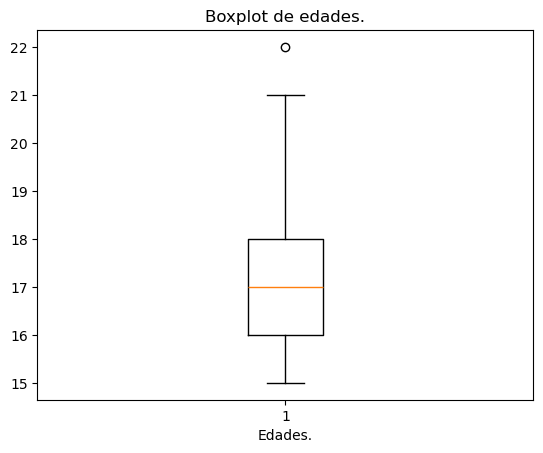

In [13]:
plt.boxplot(df['Edad'].dropna())
plt.title('Boxplot de edades.')
plt.xlabel('Edades.')
plt.show()

Para la variable de Edad, obtenemos como outlier que hay edades más altas que el promedio, siendo alrededor de 17 años - estos outliers son los de 21 y 22 años, dándonos a entender que hay registros de alumnos hasta de estas edades.

In [14]:
q1 = df.HorasDeEstudio.quantile(0.25)
q3 = df.HorasDeEstudio.quantile(0.75)
iqr = q3 - q1
li = q1 - (1.5 * iqr)
ls = q3 + (1.5 * iqr)
out = np.where((df.Edad <= li) | (df.Edad >= ls))[0]
print(df.iloc[out, :])

    Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  \
0        GP    F    18               2           0       no       6   5   6   
1        GP    F    17               2           0      yes       4   5   5   
2        GP    F    15               2           3      yes      10   7   8   
3        GP    F    15               3           0      yes       2  15  14   
4        GP    F    16               2           0       no       4   6  10   
..      ...  ...   ...             ...         ...      ...     ...  ..  ..   
390      MS    M    20               2           2       no      11   9   9   
391      MS    M    17               1           0      yes       3  14  16   
392      MS    M    21               1           3       no       3  10   8   
393      MS    M    18               1           0      yes       0  11  12   
394      MS    M    19               1           0      yes       5   8   9   

     G3  Escuela_Num  Sexo_Num  Internet_Num  
0   

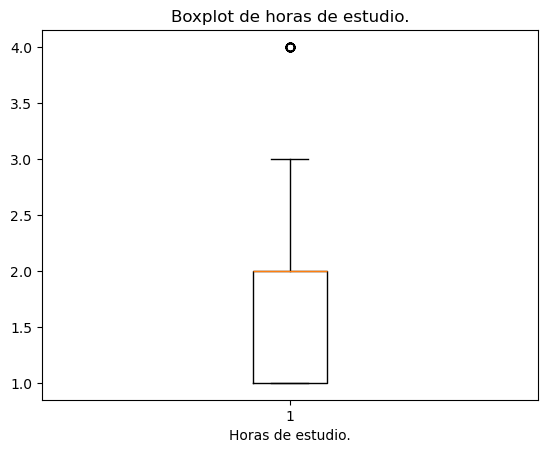

In [15]:
plt.boxplot(df['HorasDeEstudio'].dropna())
plt.title('Boxplot de horas de estudio.')
plt.xlabel('Horas de estudio.')
plt.show()

Para la variable de horas de estudio (HorasDeEstudio), obtenemos un outlier de hasta 4 horas de estudio, siendo una hora más del Q3 - para saber si dicha hora extra de estudio tienen algún impacto en el desempeño de los estudiantes, se puede aplicar un filtro dentro del DataFrame con la variable de HorasDeEstudio y la condición de tomar que este valor de la variable sea mayor a 3.

In [16]:
# Aplicar el filtro.
df[df['HorasDeEstudio'] > 3]

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3,Escuela_Num,Sexo_Num,Internet_Num
47,GP,M,16,4,0,yes,4,19,19,20,0,1,1
66,GP,M,15,4,0,yes,4,13,13,12,0,1,1
67,GP,F,16,4,0,yes,4,7,7,6,0,0,1
69,GP,F,15,4,0,yes,12,16,16,16,0,0,1
70,GP,M,16,4,0,yes,0,13,15,15,0,1,1
71,GP,M,15,4,0,yes,0,10,10,10,0,1,1
76,GP,M,15,4,0,yes,8,11,11,10,0,1,1
77,GP,F,16,4,0,yes,0,11,11,11,0,0,1
94,GP,M,15,4,0,yes,6,11,13,14,0,1,1
95,GP,F,15,4,1,yes,2,7,10,10,0,0,1


In [17]:
print('Max = ', df['G1'].max())
print('Max = ', df['G2'].max())
print('Max = ', df['G3'].max())

Max =  19
Max =  19
Max =  20


Aquí podemos obtener más conocimiento de aquellos estudiantes con el outlier de 4 horas de estudio, concluimos lo siguiente de nuestros datos:
* Todos los alumnos pertenecen a la escuela GP (número 0).

* Estos alumnos **NO** tienen material reprobadas.

* La gran mayoría (casi todos), centa con conexión a internet - por lo que se puede creer que los que sí cuentan con internet, se apoyan de recursos digitales.

* Sin embargo, sus calificaciones pueden mejorar, entonces hay un área de oportunidad importante para el desempeño de la institución académica si sus estudiantes están haciendo un esfuerzo extra genuino o solo gastan una hora de su tiempo sin una razón/efecto positivo.

In [18]:
q1 = df.Reprobadas.quantile(0.25)
q3 = df.Reprobadas.quantile(0.75)
iqr = q3 - q1
li = q1 - (1.5 * iqr)
ls = q3 + (1.5 * iqr)
out = np.where((df.Edad <= li) | (df.Edad >= ls))[0]
print(df.iloc[out, :]) 

    Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  \
0        GP    F    18               2           0       no       6   5   6   
1        GP    F    17               2           0      yes       4   5   5   
2        GP    F    15               2           3      yes      10   7   8   
3        GP    F    15               3           0      yes       2  15  14   
4        GP    F    16               2           0       no       4   6  10   
..      ...  ...   ...             ...         ...      ...     ...  ..  ..   
390      MS    M    20               2           2       no      11   9   9   
391      MS    M    17               1           0      yes       3  14  16   
392      MS    M    21               1           3       no       3  10   8   
393      MS    M    18               1           0      yes       0  11  12   
394      MS    M    19               1           0      yes       5   8   9   

     G3  Escuela_Num  Sexo_Num  Internet_Num  
0   

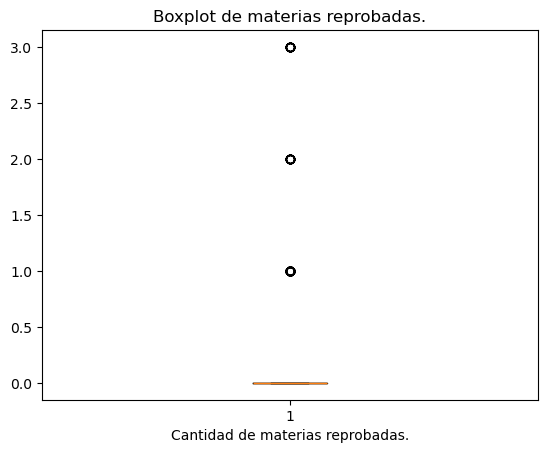

In [19]:
plt.boxplot(df['Reprobadas'].dropna())
plt.title('Boxplot de materias reprobadas.')
plt.xlabel('Cantidad de materias reprobadas.')
plt.show()

Para la variable de Reprobadas, con relación a las materias reprobadas, se nota que la gran mayoría de alumnos han aprobado sus materias, ya que son muy pocos (y por ende, registrados como outliers) los alumnos con 1, 2 o 3 materias reprobadas.

In [20]:
q1 = df.Faltas.quantile(0.25)
q3 = df.Faltas.quantile(0.75)
iqr = q3 - q1
li = q1 - (1.5 * iqr)
ls = q3 + (1.5 * iqr)
out = np.where((df.Edad <= li) | (df.Edad >= ls))[0]
print(df.iloc[out, :]) 

    Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  \
247      GP    M    22               1           3      yes      16   6   8   
306      GP    M    20               1           0       no       0  17  18   
376      MS    F    20               3           2      yes       4  15  14   
390      MS    M    20               2           2       no      11   9   9   
392      MS    M    21               1           3       no       3  10   8   

     G3  Escuela_Num  Sexo_Num  Internet_Num  
247   8            0         1             1  
306  18            0         1             0  
376  15            1         0             1  
390   9            1         1             0  
392   7            1         1             0  


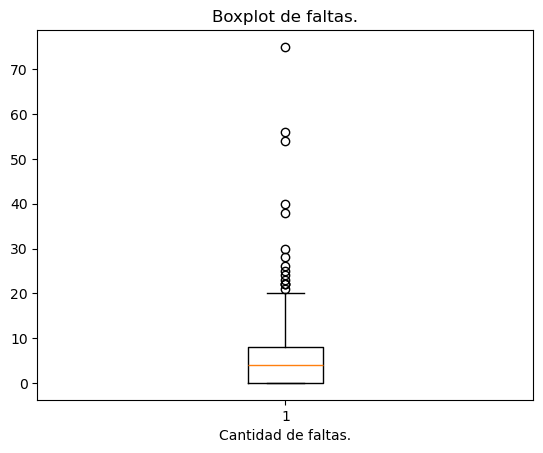

In [21]:
plt.boxplot(df['Faltas'].dropna())
plt.title('Boxplot de faltas.')
plt.xlabel('Cantidad de faltas.')
plt.show()

In [22]:
print('Min = ', df['Faltas'].min())
print('Max = ', df['Faltas'].max())
print('Mean = ', df['Faltas'].mean())

Min =  0
Max =  75
Mean =  5.708860759493671


In [23]:
# Aplicar el filtro.
df[df['Faltas'] > 70]

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3,Escuela_Num,Sexo_Num,Internet_Num
276,GP,F,18,2,0,yes,75,10,9,9,0,0,1


Finalmente, observando la variable de Faltas, el gráfico de boxplot explota en cantidades ya que los valores dentro de esta variable se extienden mucho, teniendo a alumnos con hasta 75 faltas.

Como este valor es demasiado grande, al momento de querer estudiarlo, nos damos cuenta que el alumno cuenta con las siguientes características:
* Es de la escuela GP (número 0).

* Es de género femenino.

* Tiene 2 horas de estudio, la cuál es la cantidad de horas promedio.

* Cuenta con internet.

* Sin embargo, tiene bajas calificaciones.

De aquí se puede concluir que con este nivel de faltas, sea una alumna incumplida o también una alumna que cuenta con una situación que la impide asistir a clases, por lo que solo se le fueron acumulando las mismas - es un caso de estudio breve solo para confirmar el por qué de la existencia de este outlier.

**Colinealidad.**

Una vez habiendo realizado el estudio de los datos, es que ahora seguimos en la búsqueda de si estos presentan colinealidad entre ellos ya que vamos a proseguir en la construcción del modelo.

Primero, se observarán los coeficientes de correlación con la variable establecida de G3, que está será nuestra variable dependiente ya que queremos trabajar con las calificaciones **finales** de los estudiantes. Más adelante se explicará esto más a profundidad, por ahora solo se menciona para dar justificación al escenario actual.

In [24]:
# Determinar la correlación de variables.
df.corr(numeric_only = True).sort_values(by = 'G3', ascending = False)

,Edad,HorasDeEstudio,Reprobadas,Faltas,G1,G2,G3,Escuela_Num,Sexo_Num,Internet_Num
G3,-0.161579,0.097820,-0.360415,0.034247,0.801468,0.904868,1.000000,-0.045017,0.103456,0.098483
G2,-0.143474,0.135880,-0.355896,-0.031777,0.852118,1.000000,0.904868,-0.050086,0.091099,0.119439
G1,-0.064081,0.160612,-0.354718,-0.031003,1.000000,0.852118,0.801468,-0.025731,0.091839,0.071619
Sexo_Num,-0.028606,-0.306268,0.044436,-0.066962,0.091839,0.091099,0.103456,-0.012286,1.000000,0.044113
Internet_Num,-0.112094,0.059422,-0.063451,0.101701,0.071619,0.119439,0.098483,-0.133578,0.044113,1.000000
HorasDeEstudio,-0.004140,1.000000,-0.173563,-0.062700,0.160612,0.135880,0.097820,-0.090681,-0.306268,0.059422
Faltas,0.175230,-0.062700,0.063726,1.000000,-0.031003,-0.031777,0.034247,-0.088480,-0.066962,0.101701
Escuela_Num,0.377610,-0.090681,0.059804,-0.088480,-0.025731,-0.050086,-0.045017,1.000000,-0.012286,-0.133578
Edad,1.000000,-0.004140,0.243665,0.175230,-0.064081,-0.143474,-0.161579,0.377610,-0.028606,-0.112094
Reprobadas,0.243665,-0.173563,1.000000,0.063726,-0.354718,-0.355896,-0.360415,0.059804,0.044436,-0.063451


Con la correlación a G3, podemos ver que existen valores muy altos con G3-G2 (0.90) y G3-G1 (0.80), por lo que se puede delimitar que estas 2 variables tienen conflicto entre si mismas al estar coexistiendo a la vez.

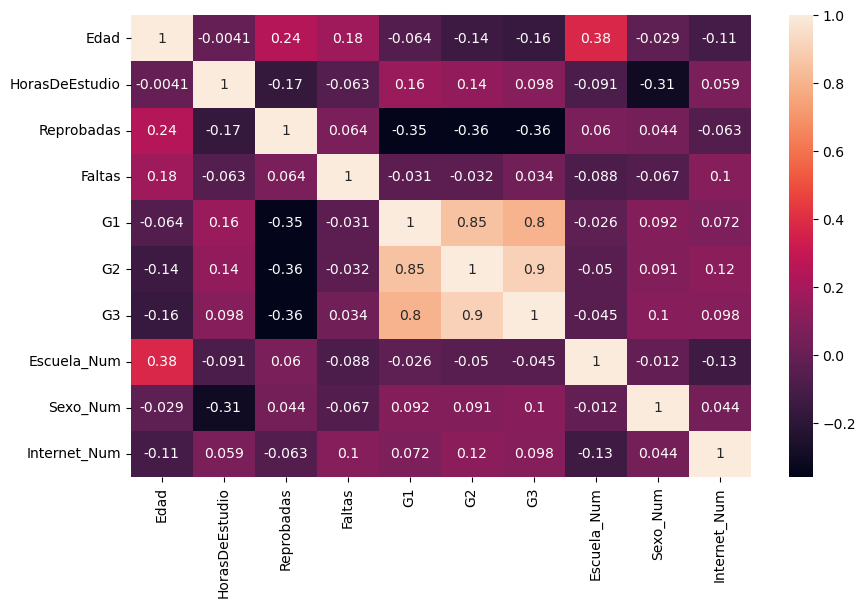

In [25]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

Con el mapa de calor, seguimos concluyendo lo mismo que anteriormente con la correlación, solo que ahora con recursos visuales.

In [26]:
X = df[['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas', 'G1', 'G2', 'Escuela_Num', 'Sexo_Num', 'Internet_Num']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature        VIF
0            Edad  25.287109
1  HorasDeEstudio   8.192844
2      Reprobadas   1.487592
3          Faltas   1.608433
4              G1  45.063213
5              G2  34.240901
6     Escuela_Num   1.249744
7        Sexo_Num   2.171089
8    Internet_Num   6.096964


Sin embargo, para obtener una tercera opinión se realizará un pequeño análisis con la inflación de varianza (FIV o VIF en inglés).

Según GeeksforGeeks (2025), para mejorar la fiabilidad del modelo bajo el criterio de la colinealidad, se utiliza este método de inflación de varianza, donde este muestra como la varianza aumenta debido a los valores tan parecidos entre las variables independientes.

Interpretación del FIV:
* FIV ≈ 1: Sin correlación con otros predictores.

* 1 < FIV ≤ 5: Correlación leve a moderada (generalmente fina).

* FIV > 10: Fuerte multicolinealidad -> tomar medidas correctivas.

Una vez que obtuvimos los FIVs de nuestras variables, las que presentan un valor demasiado alto, es decir, mayor a 10 y que por ende, presentan una fuerte multicolinealidad, son las siguientes:
* Edad.

* G1.

* G2.

Volviendo a mencionar que nuestra variable dependiente es G3, para analizar cuáles variables independientes hay que eliminar, podemos concluir lo siguiente:

Como queremos predecir la calificación final de los alumnos, no nos sirve de nada la variable de **Edad**, aparte de que presenta un alto valor de FIV, **se elimina**.

Para las variables de G1 y G2, aquí hay una excepción interesante, siendo G1 el equivalente como al primer parcial y G2 como al segundo parcial (consecuente al G3 siendo el tercer parcial/final) - esto surge debido a que, para predecir una calificación final, es que necesitamos de datos, para poder entrenar al modelo y que es importante que los mismos sean de buena calidad y con relevancia al estudio. 

Esto mencionándolo ya que bajo la separación de las Gs, la **G1** puede ser la más irrelevante al momento de predecir la calificación final, ya que es un valor muy lejano en tiempo de la calificación final, muchas cosas pudieron haber cambiado de ese momento al final del semestre, además de su colinealidad, por lo que **se elimina**.

Sin embargo, podemo sacarle provecho a **G2** siendo esta la variable referente al segundo parcial, ya que ocurrió más recientemente y por ende, los temas que se ven dentro de este parcial son muy probables de verse reflejados en evaluaciones finales y así en la calificación final, como un proceso por etapas; aparte, se necesita de más datos para que el modelo pueda pronosticar correctamente aparte de solo una característica siendo G3, donde esta nisiquiera forma parte de las entradas, es por eso que esta variable **se queda**.

# 3.1 Variables.

**Variable dependiente.**

Se mencionó anteriormente en el estudio que la variable dependiente es la de G3, pero no se mencionó su por qué.

Esta decisión viene de querer pronosticar las calificaciones finales, que se pueden reflejar en esta variable al ser la última que almacena las calificaciones.

**Variables independientes.**

Por otro lado, para las variables independientes (en plural, por estar tratando con Regresión Lineal **Múltiple**), serán las siguientes:
* HorasDeEstudio.

* Reprobadas.

* Faltas.

* G2.

* Escuela_Num.

* Sexo_Num.

* Internet_Num.

Esto se delimitó debido al estudio de colinealidad que se hizo anteriormente bajo el criterio del FIV, además del criterio propio, conociendo el objetivo y alcance que se desea para el modelo.

# 4.1 Metodología.

Comenzamos con el modelo de Regresión Lineal Múltiple, primero definiendo las variables que ya definimos anteriormente como dependiente e independientes.

In [35]:
# Definir quién sera mi "x" y "y".
y = df[['G3']] # Doble [].
x = df[['HorasDeEstudio', 'Reprobadas', 'G2', 'Faltas', 'Escuela_Num', 'Sexo_Num', 'Internet_Num']]
print(y.shape)
print(x.shape)

(395, 1)
(395, 7)


Dividimos los datos de entrenamiento y prueba.

In [36]:
# Dividir los tratos en train y test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((316, 7), (79, 7), (316, 1), (79, 1))

Ahora si, llamamos a la librería exportada anteriormente para definir el modelo de Regresión Lineal.

In [37]:
# Formulamos el modelo.
modelRLM = LinearRegression()
# Entrenamos el modelo.
modelRLM.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Inferencia.**

Para el modelo de Regresion Lineal Múltiple, comenzamos analizando el aspecto de la inferencia para conocer cómo se están comportando nuestros datos actualmente.

In [38]:
x = df[['HorasDeEstudio', 'Reprobadas', 'G2', 'Faltas', 'Escuela_Num', 'Sexo_Num', 'Internet_Num']]
y = df['G3']

# Split train-test.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Escalado.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# DataFrame y agregar const.
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns, index=x_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x.columns, index=x_test.index)

# Agrega const para intercepto.
x_train_final = sm.add_constant(x_train_scaled_df, has_constant='add')
x_test_final = sm.add_constant(x_test_scaled_df, has_constant='add')

model = sm.OLS(y_train, x_train_final).fit()

print(model.summary())

# Predicciones
y_train_pred = model.predict(x_train_final)
y_test_pred = model.predict(x_test_final)

# Métricas de sklearn (estas son las correctas).
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('---------------------MÉTRICAS------------------------------------')
print('MAE_TRAIN: ',mae_train,'MAE_TEST: ',mae_test)
print('RMSE_TRAIN: ',rmse_train,'RMSE_TEST: ',rmse_test)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     225.0
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          4.86e-117
Time:                        12:01:39   Log-Likelihood:                -643.42
No. Observations:                 316   AIC:                             1303.
Df Residuals:                     308   BIC:                             1333.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.3259      0.106     97.

Del estudio de inferencia de nuestro modelo, obtenemos los siguientes resultados que valen la pena mencionar:
* R2 = 0.836
    * Se explica alrededor de un 83.6% de la variabilidad de G3.

* F estadística = 225
    * **Significativo**.

* MAE_TRAIN = 1.12 y MAE_TEST = 1.31
    * Error absoluto es **bajo**.

* RMSE_TRAIN = 1.85 y RMSE_TEST = 2.15
    * Error cuadrático es **bajo**.

Con estos valores, podemos concluir que el modelo tiene un **buen desempeño** bajo el umbral de la inferencia.

**Predicción.**

Seguimos por abarcar el aspecto de la predicción del modelo de Regresión Lineal Múltiple, esto para realizar pronósticos. 

Primero, validamos qué tal pronostica nuestro modelo.

In [40]:
# Validar si el modelo pronostica adecuadamente.
y_pred_test = modelRLM.predict(x_test)
print(y_pred_test[0:5])
print(y_test.head())

[[ 6.55282932]
 [12.04640883]
 [ 4.32823332]
 [ 8.71947473]
 [ 8.88172922]]
78     10
371    12
248     5
55     10
390     9
Name: G3, dtype: int64


Seguimos con la diferencia entre las R2 de los datos de entrenamiento y prueba, a lo que tenemos un resultado de aproximadamente 4.8% - con esto se puede concluir que para pronósticos, el modelo es **confiable** y se **descarta** la presencia de **overfitting**.

In [42]:
R2_train = modelRLM.score(x_train, y_train)
print('R2 train = {:.2f}'.format(R2_train))
R2_test = modelRLM.score(x_test, y_test)
print('R2 test = {:.2f}'.format(R2_test))
print('Diferencia = {:.4f}%'.format(np.abs(R2_train-R2_test)*100))

R2 train = 0.83
R2 test = 0.79
Diferencia = 4.8047%


Ahora, calculando los errores de los datos de entrenamiento y de prueba reflejan valores bajos, menores a un 10%, por lo que de igual forma podemos concluir del modelo (en este caso) que este es **preciso** en sus pronósticos.

Podemos estar 100% de acuerdo que el modelo de Regresión Lineal Múltiple establecido por las variables elegidas, cumple con la confiabilidad y precisión requeridas para pronósticos que sean lo más apegado a los datos reales.

In [43]:
# Obtener y_pred_train - pred = gorrito.
y_pred_train = modelRLM.predict(x_train)

# Importar las librerías para el cálculo de error.
from sklearn.metrics import mean_squared_error # MSE.
from sklearn.metrics import mean_absolute_percentage_error #MAPE.

# Calculamos los errores de train.
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train) # SQRT DEL MSE ES EL RMSE.
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)*100

print('MSE train = {:.2f}'.format(mse_train))
print('RMSE train = {:.2f}'.format(rmse_train))
print('MAPE train = {:.2f}'.format(mape_train))

# Calculamos los errores de test.
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_train) # SQRT DEL MSE ES EL RMSE.
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)*100

print('\nMSE test = {:.2f}'.format(mse_test))
print('RMSE test = {:.2f}'.format(rmse_test))
print('MAPE test = {:.2f}'.format(mape_test))

MSE train = 3.48
RMSE train = 1.87
MAPE train = 197809661420952352.00

MSE test = 4.39
RMSE test = 1.87
MAPE test = 186480198849301376.00


Una vez confirmando el estado de nuestro modelo, es que podemos proseguir con los pronósticos.

x = df[['HorasDeEstudio', 'Reprobadas', 'G2', 'Faltas', 'Escuela_Num', 'Sexo_Num', 'Internet_Num']]

In [45]:
df

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3,Escuela_Num,Sexo_Num,Internet_Num
0,GP,F,18,2,0,no,6,5,6,6,0,0,0
1,GP,F,17,2,0,yes,4,5,5,6,0,0,1
2,GP,F,15,2,3,yes,10,7,8,10,0,0,1
3,GP,F,15,3,0,yes,2,15,14,15,0,0,1
4,GP,F,16,2,0,no,4,6,10,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,2,no,11,9,9,9,1,1,0
391,MS,M,17,1,0,yes,3,14,16,16,1,1,1
392,MS,M,21,1,3,no,3,10,8,7,1,1,0
393,MS,M,18,1,0,yes,0,11,12,10,1,1,1


Por ejemplo, para realizar un pronóstico breve, se trataran los siguientes datos:
* HorasDeEstudio: 1

* Reprobadas: 0

* G2: 10

* Faltas: 0

* Escuela_Num: 1

* Sexo_Num: 0

* Internet_Num: 1

In [46]:
modelRLM.predict([[1, 0, 10, 0, 1, 0, 1]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[9.51160084]])

Obtenemos una predicción bajo estos valores de una calificación final de aproximadamente 9.51, que es algo bajo conociendo que la calificación máxima es de 20.

# 5.1 Resultados.

Nuevamente, mencionando los resultados que se abordaron anteriormente al tener la conclusión de cada aspecto siendo de la inferencia o del pronóstico, se estableció que del lado de la inferencia, el modelo es significativo, esto por su estadístico F y su capacidad de explicar hasta un 83.6% - por el lado del pronóstico, su diferencia entre los R2 de los datos de entrenamiento y prueba es menor a un 10%, significando que es confiable, agregando que el mismo es preciso por sus errores que de igual forma, son menores a un 10%.

A todo esto, es que se confirma que las variables elegidas pudieron generar un modelo de Regresión Lineal Múltiple que comprenda los datos actuales bajo la inferencia, y también tenga la capacidad de generar pronósticos acertados y confiables.

# 6.1 Discusiones.

Un aspecto que requirió de más esfuerzo a lo largo del desarrollo del reporte fue el aspecto de la elección de variables bajo el criterio de la colinealidad, aparte de los valores del FIV, también fue que se tomó en cuenta el critero humano para poder darle interpretabilidad a cómo estará trabajando el modelo - esto incluyendo el G2 que en muchos casos, otros estudios la harían de lado, caso que no es aplicado en este escenario específico.

# 7.1 Conclusiones.

Para concluir, el seguir practicando el desarrollo de modelos de Regresión Lineal Múltiple es de mucha ayuda para comprender como los datos y respuestas cuantitativas, brindan información acerca de la base de datos con la que se está trabajando - por ejemplo, para comprender ciertos aspectos de las bases de datos, se utilizaron los datos que estaban desplegados de forma cuantitativa, donde bajo el criterio humano, es que se le da interpretabilidad a las matemáticas y así es como se pueden explicar los resultados que la regresión brinda bajo este escenario de las calificaciones finales de los alumnos.

De igual forma, estos resultados no podrían ser de esta calidad que se menciona si es que anteriormente no se realizó una selección de características, ya que si hubieramos generado el modelo con todas las variables dadas, es que este no hubiera tenido un ajuste tan exacto como resultó siendo al final - pero esto solo sucedió una vez que se profundizó en la base de datos brindada, empapándonos del contexto y haciendo una toma de decisiones (nuevamente) matemática y crítica.

# 7.2 Aprendizajes.

Como aprendizajes de este estudio, es que (como se mencionó en discusiones) el uso y breve pausa en la Selección de Características fue de mucha ayuda para entender el por qué de la colinealidad existente entre los datos, esto mediante el uso de métodos como el FIV que es el caso de este estudio, pero que también hay muchas otras herramientas que ayudan a comprobar la existencia de colinealidad - dicho esto, es que el modelo mejora exponencialmente para mejor.

# 7.3 Implicaciones.

Las implicaciones que pueden involucrarse bajo el uso de la Regresión Lineal Múltiple son muchas, esto con el propósito de conocer el comportamiento de los datos y el cómo la recopilación de los mismos nos ayuda a predecir resultados que podrían suceder, pero dicha calidad de resultados que obtengamos dependen de las características que se introducen al modelo para que este se entrene, esto haciendo referencia a lo vital que es la Selección de Características.

No se deja de lado el aspecto de los outliers, donde los mismos nos indican los aspectos qué pueden generar ruido dentro de nuestros datos y valen la pena de estudiar para un análisis más enriquecedor.

# 7.5 Posibles líneas futuras.

Haciendo referencia a las implicaciones mencionadas anteriormente, es donde también entra una posible línea probablemente para el desempeño de los maestros (bajo el mismo contexto de una escuela y de personas), donde también de seguro existen variables que presenten colinealidad entre ellas y diversos outliers.

# 8.1 Referencias.

GeeksforGeeks. (2025). Detecting Multicollinearity with VIF Python. GeeksforGeeks. https://www.geeksforgeeks.org/python/detecting-multicollinearity-with-vif-python/

UCI Machine Learning Repository. (s. f.). https://archive.ics.uci.edu/dataset/320/student+performance

# 9.1 Código de Honor de la Universidad de Monterrey.

Doy mi palabra que he realizado esta actividad con integridad académica.